In [1]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------------------- ------ 8.1/9.8 MB 50.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 43.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## **Lineare Regression mit der Methode der kleinsten Quadrate**

Die einfache lineare Regression untersucht den Zusammenhang zwischen einer **unabh√§ngigen Variablen** ($x$) und einer **abh√§ngigen Variablen** ($y$) und findet eine Gerade, die diesen Zusammenhang beschreibt. Ziel ist es, die **Summe der quadrierten Fehler (Residuen)** zwischen den tats√§chlichen Werten ($y$) und den vorhergesagten Werten ($\hat{y}$) zu minimieren.

<img src=https://statistikgrundlagen.de/ebook/wp-content/uploads/sites/2/2020/10/Bild7-10.png></img>

### **1. Notationen**

- **$x$:** Die unabh√§ngige Variable (auch **Feature** genannt), die f√ºr die Vorhersage verwendet wird.
 
- **$\bar{x}$ :** Der Mittelwert der unabh√§ngigen Variable $x$.
  
- **$y$:** Die abh√§ngige Variable (auch **Zielvariable** genannt), die vorhergesagt werden soll.
 

- **$\bar{y}$ :** Der Mittelwert der abh√§ngigen Variable $y$.
 
- **$\hat{y}$ :** Der durch die Regressionsgerade berechnete Vorhersagewert f√ºr $y$ basierend auf $x$.
  

### **2. Ziel der Methode der kleinsten Quadrate**

Die Methode der kleinsten Quadrate minimiert die **Summe der quadrierten Fehler (Residuen)**:
$$
S = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Das Ziel ist, die optimale Gerade $\hat{y} = \beta_0 + \beta_1 x$ zu finden, indem $\beta_0$ (Achsenabschnitt) und $\beta_1$ (Steigung) berechnet werden.



### **3. Formel f√ºr die lineare Regressionsgerade**

Die Gleichung der linearen Regressionsgerade lautet:
$$
\hat{y} = \beta_0 + \beta_1 x
$$
Dabei:
- **$\beta_0$:** Achsenabschnitt (Intercept), der den Wert von $y$ angibt, wenn $x = 0$.
- **$\beta_1$:** Steigung (Slope), die angibt, wie stark sich $y$ √§ndert, wenn $x$ um eine Einheit steigt.



### **4. Berechnung der Koeffizienten**

#### **4.1. Steigung ($\beta_1$):**

Die Steigung wird berechnet als:
$$
\beta_1 = \frac{\text{Kovarianz}(x, y)}{\text{Varianz}(x)}
$$
Entsprechend:
$$
\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

#### **4.2. Achsenabschnitt ($\beta_0$):**

Der Achsenabschnitt wird berechnet als:
$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$


### **5. Die Genauigkeit der Regressionsgeraden und Residuen**

Die Regressionsgerade ist eine **Sch√§tzung**, die versucht, den Zusammenhang zwischen der unabh√§ngigen Variable und der abh√§ngigen Variable zu modellieren. Sie minimiert die Summe der quadrierten Abweichungen zwischen den tats√§chlichen Werten  und den vorhergesagten Werten .

Ein **Residuum** $e_i$ ist die Differenz zwischen dem tats√§chlichen Wert $y_i$ und dem durch die Regressionsgerade vorhergesagten Wert $\hat{y}_i$:
$$
e_i = y_i - \hat{y}_i
$$
Residuen zeigen die **Ungenauigkeit der Regressionsgeraden**: Sie messen, wie weit der tats√§chliche Punkt $y_i$ von der gesch√§tzten Gerade $hat{y}_i$ entfernt ist.


### **6. Beispielrechnung**
#### **6.1 Daten importieren und anzeigen**
Wir betrachten einen Datensatz der Mietpreise und die Gr√∂√üe von Wohnungen enth√§lt.<br>
Wir wollen anhand der Gr√∂√üe den Preis vorhersagen.

In [4]:
df = pd.read_csv("size-rent-4-pandas.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Size    16 non-null     int64
 1   Rent    16 non-null     int64
dtypes: int64(2)
memory usage: 388.0 bytes


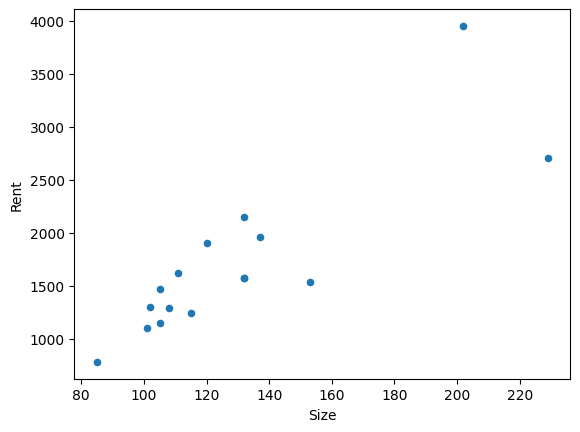

In [5]:
df.plot(x="Size", y="Rent", kind="scatter");

#### **6.2 Koeffizienten $\beta_0$ und $\beta_1$ berechnen**

In [6]:
x = df["Size"]
y = df["Rent"]

# Mittelwerte berechnen
x_mean = x.mean()
y_mean = y.mean()

# Kovarianz und Varianz berechnen
cov_xy = np.sum((x - x_mean) * (y - y_mean))
var_x = np.sum((x - x_mean) ** 2)

# Koeffizienten berechnen
beta_1 = cov_xy / var_x  # Steigung
beta_0 = y_mean - beta_1 * x_mean  # Achsenabschnitt

#### **6.3 Ergebnis darstellen**

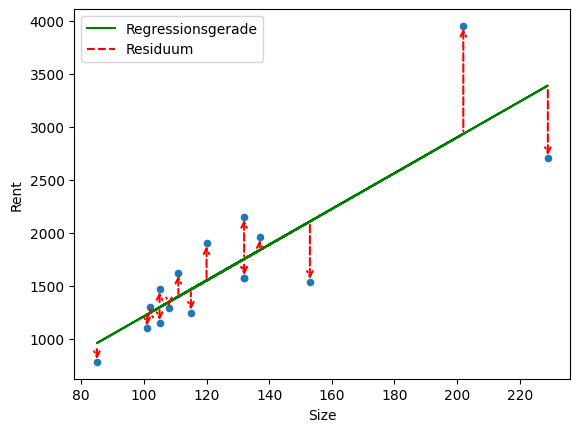

In [7]:
# gesch√§tzer Wert wird mit Hilfe der Koeffizienten berechnet
y_hat = beta_0 + beta_1 * x    

df.plot(x="Size", y="Rent", kind="scatter")
plt.plot(x, y_hat, color="green", label="Regressionsgerade")

# Residuen einzeichnen
for i in range(len(df)):
    plt.annotate(
        "", 
        xy=(x.iloc[i], y_hat.iloc[i]),  
        xytext=(x.iloc[i], df["Rent"].iloc[i]),  
        arrowprops=dict(color='red',linestyle="--", arrowstyle='<-', lw=1.5)
    )
        
# Dummy-Handle f√ºr Residuen hinzuf√ºgen
plt.plot([], [],linestyle="--", color="red", label="Residuum")    
plt.legend()
plt.show()

## **Vorraussetzungen f√ºr lineare Regression**
### **1. Lineare Beziehung zwischen den Variablen**
Es muss eine lineare Beziehung zwischen der unabh√§ngigen Variable
$x$ und der abh√§ngigen Variable $y$ bestehen.<br>
Dies bedeutet, dass sich 
$y$ durch $x$ als $y=\beta_0 +\beta_1 \times x$ beschreiben l√§sst.<br>

Ein Streudiagramm oder Korrelationskoeffizient (niedrige Werte sprechen gegen eine lineare Beziehung) kann helfen, die Linearisierung zu √ºberpr√ºfen.
Falls die Beziehung nicht linear ist, kann eine Transformation der Variablen (z. B. Logarithmus, Quadratwurzel) sinnvoll sein.

<img src="https://datatab.de/assets/tutorial/regression/lineare_regression_voraussetzungen_linearit√§t.png"></img>

### **2. Homoskedastizit√§t (gleichbleibende Varianz der Residuen)**
Die Residuen sollten √ºber den gesamten Wertebereich von $x$ konstante Varianz aufweisen.<br>
Das bedeutet, dass die Streuung der Residuen unabh√§ngig von den Werten der unabh√§ngigen Variablen ist.

Wir k√∂nnen das mit einem Residualplot (Residuen vs. Vorhersagen) pr√ºfen:
Wenn die Punkte zuf√§llig verteilt sind, ist Homoskedastizit√§t erf√ºllt, Muster (z. B. Kegel- oder Trichterform) deuten dagegen auf Heteroskedastizit√§t hin.

Was tun bei Verst√∂√üen:

- Transformation der abh√§ngigen Variablen (z. B. Logarithmus oder Quadratwurzel).
- Verwenden von Methoden wie der robusten Regression.
<br><br>
![Homoskedastizit√§t](https://datatab.de/assets/tutorial/regression/Lineare_Regression_Homoskedastizit%C3%A4t.png)

In [9]:
# Residuen berechnen
residuals = df["Rent"] - y_hat

# Residualplot
sns.scatterplot(x=y_hat, y=residuals, color="blue", s=50)
plt.axhline(0, color='green', linestyle='--', linewidth=1.5)  # Null-Linie

# Begrenzungslinien (z. B. bei ¬±1 Standardabweichungen der Residuen)
residual_std = np.std(residuals)
plt.axhline(residual_std, color='red', linestyle='--', linewidth=1.5)
plt.axhline(-residual_std, color='red', linestyle='--', linewidth=1.5)

plt.title("Residualplot")
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.grid(alpha=0.3)
plt.show()

### **3. Die Residuen ($Y - \hat{Y}$) sollten normalverteilt sein.**

Dies ist besonders wichtig f√ºr die Validit√§t von Konfidenzintervallen und Hypothesentests.

Wir pr√ºfen das entweder grafisch durch Erstellen eines QQ-Plots bzw. eines Histogramms der Residuen mit eingetragener Dichtekurve (KDE)
oder mit Durchf√ºhrung eines Normalit√§tstests (z. B. Shapiro-Wilk-Test, Kolmogorov-Smirnov-Test).

#### **QQPlot**

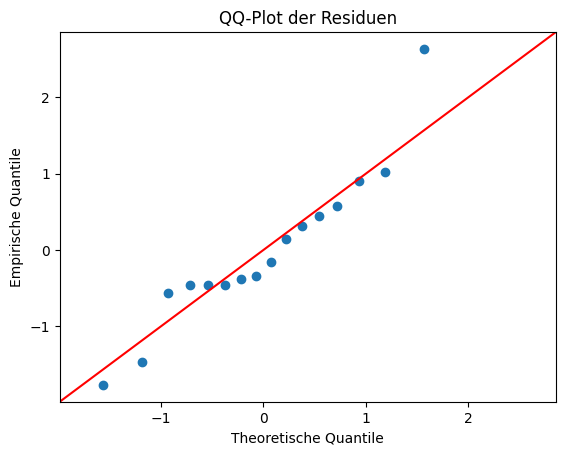

In [10]:
# QQ-Plot erstellen
sm.qqplot(residuals, line="45", fit=True)
plt.title("QQ-Plot der Residuen")
plt.xlabel("Theoretische Quantile")
plt.ylabel("Empirische Quantile")
plt.show()

#### **Histogramm mit Dichtefunktion**

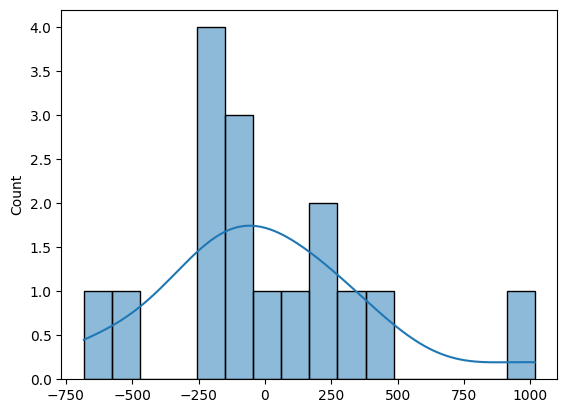

In [11]:
sns.histplot(residuals,bins=len(residuals), kde=True);

### **4. Keine Multikollinearit√§t**
Bei **multipler Regression** sollten die unabh√§ngigen Variablen $x_1, x_2, ... x_k$ nicht stark miteinander korreliert sein.<br>
Hohe Multikollinearit√§t erschwert die Sch√§tzung der Koeffizienten und deren Interpretation.<br>

Wir k√∂nnen das durch Berechnung des Korrelationskoeffizienten zwischen den unabh√§ngigen Variablen.
oder durch Berechnung des Variance Inflation Factor (VIF) √ºberpr√ºfen.<br>

Was tun bei Verst√∂√üen:

- Entfernen von stark korrelierten Variablen.
- Verwendung von Techniken wie Ridge- oder Lasso-Regression.


## **G√ºtekriterien**

In der **linearen Regression** beschreibt die **Gesamtvarianz** der abh√§ngigen Variable $y$, wie stark die Werte von ihrem Mittelwert ($\bar{y}$) abweichen. Diese Gesamtvarianz kann in zwei Teile aufgeteilt werden:

1. **Regressionsvarianz (erkl√§rte Varianz):** Der Teil der Varianz, der durch das Regressionsmodell erkl√§rt wird.
2. **Fehlervarianz (nicht-erkl√§rte Varianz):** Der Teil der Varianz, der nicht durch das Modell erkl√§rt wird und auf zuf√§llige Schwankungen oder andere Einflussfaktoren zur√ºckzuf√ºhren ist.


### **Gesamtvarianz:**
Die Gesamtvarianz der Zielvariablen $y$ wird berechnet als:
$$
\text{Gesamtvarianz} = \sum_{i=1}^n (y_i - \bar{y})^2
$$
Sie beschreibt die Summe der quadrierten Abweichungen der tats√§chlichen Werte $y_i$ vom Mittelwert $\bar{y}$).


### **Regressionsvarianz (erkl√§rte Varianz):**
Die **Regressionsvarianz** ist der Anteil der Gesamtvarianz, den das Modell durch die Vorhersage erkl√§rt. Sie wird berechnet als:
$$
\text{Regressionsvarianz} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$
Hier ist $\hat{y}_i$ der durch die Regressionsgerade vorhergesagte Wert.
Diese Gr√∂√üe gibt an, wie gut das Modell die Streuung der Daten erkl√§ren kann.

Eine hohe Regressionsvarianz bedeutet, dass das Modell die Daten gut beschreibt und ein Gro√üteil der Gesamtvarianz erkl√§rt wird.


### **Fehlervarianz (nicht-erkl√§rte Varianz):**
Die **Fehlervarianz** ist der Rest der Varianz, der nicht durch das Modell erkl√§rt wird. Sie wird berechnet als:
$$
\text{Fehlervarianz} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
Sie beschreibt die Summe der quadrierten Abweichungen der tats√§chlichen Werte $y_i$ von den vorhergesagten Werten $\hat{y}_i$.

Eine hohe Fehlervarianz bedeutet, dass das Modell nicht in der Lage ist, die Daten gut zu erkl√§ren, und es m√∂glicherweise nicht-linearer Zusammenh√§nge oder weiterer Einflussfaktoren bedarf.


### **Zusammenhang zwischen den Komponenten:**
Die Gesamtvarianz ($SST$) setzt sich aus der Regressionsvarianz ($SSR$) und der Fehlervarianz ($SSE$) zusammen:
$$
SST = SSR + SSE
$$
- $SST$: Gesamtvarianz $\sum_{i=1}^n (y_i - \bar{y})^2$.
- $SSR$: Regressionsvarianz $\sum_{i=1}^n \hat{y}_i - \bar{y})^2$.
- $SSE$: Fehlervarianz $\sum_{i=1}^n (y_i - \hat{y}_i)^2$.

### **Anwendung: Bestimmtheitsma√ü $(R^2$) auch Determinationskoeffizient gennant**
Das **Bestimmtheitsma√ü** $R^2$ gibt an, welcher Anteil der Gesamtvarianz durch das Modell erkl√§rt wird:
$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$
- $R^2$ liegt zwischen $0$ und $1$:
  - $R^2 = 1$: Das Modell erkl√§rt die gesamte Varianz ($SSE = 0$).
  - $R^2 = 0$: Das Modell erkl√§rt keine Varianz ($SSR = 0$).

Bei einfacher linearer Regression entspricht $R^2$ dem Quadrat des Korrelationskoeffizienten ùëü zwischen den vorhergesagten Werten 
$\hat{y}$ und den tats√§chlichen Werten $y$.

### **Beispiel:**
Angenommen, die tats√§chlichen Werte ($y$) haben eine Gesamtvarianz von 100:
- Das Modell erkl√§rt 80 der Varianz ($SSR = 80$).
- Die restlichen 20 sind Fehlervarianz ($SSE = 20$).

Das Bestimmtheitsma√ü w√§re:
$$
R^2 = \frac{80}{100} = 0.8
$$
Das bedeutet, das Modell erkl√§rt 80% der Gesamtvarianz, und 20% bleiben unerkl√§rt.



### **Alternative Metriken (die wir benutzen)**
#### **1. Mean Absolute Error (MAE)**
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$
- **Bedeutung:** Der durchschnittliche absolute Fehler zwischen den tats√§chlichen Werten $y_i$ und den vorhergesagten Werten $\hat{y}_i$.
- **Eigenschaften:**
  - Einfach zu interpretieren, da der Fehler in derselben Einheit wie die Zielvariable angegeben wird.
  - Robuster gegen√ºber Ausrei√üern als MSE.
- **Nachteil:** Gro√üe Fehler werden nicht st√§rker gewichtet.


#### **2. Mean Squared Error (MSE)**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
- **Bedeutung:** Der durchschnittliche quadratische Fehler zwischen den tats√§chlichen und vorhergesagten Werten.
- **Eigenschaften:**
  - Bestraft gr√∂√üere Fehler st√§rker, da sie quadriert werden.
- **Nachteil:** Das Ergebnis ist in quadratischen Einheiten, was die Interpretation erschwert. Kann durch Ausrei√üer stark beeinflusst werden.


#### **3. Root Mean Squared Error (RMSE)**
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$
- **Bedeutung:** Die Quadratwurzel des MSE, wodurch der Fehler in der gleichen Einheit wie die Zielvariable angegeben wird.
- **Eigenschaften:**
  - Intuitiv interpretierbar.
  - Sensitiver gegen√ºber gro√üen Fehlern (√§hnlich wie MSE).
- **Nachteil:** Kann durch Ausrei√üer stark beeinflusst werden.
